In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import re

In [96]:
url = 'https://raw.githubusercontent.com/AvSharma31/Assessment_10_march/main/Bengaluru_House_Data.csv'
df = pd.read_csv(url)

In [97]:
bengaluru_data = df

print(bengaluru_data.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


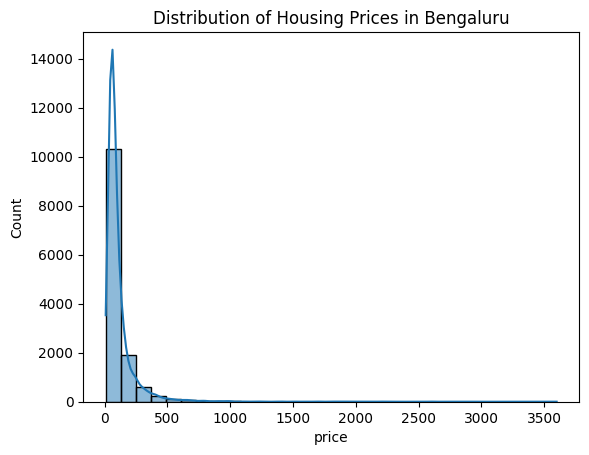

In [98]:
print(bengaluru_data.isnull().sum())

print(bengaluru_data.describe())

sns.histplot(bengaluru_data['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices in Bengaluru')
plt.show()

<ipython-input-99-d0b6968873b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bengaluru_data.corr()


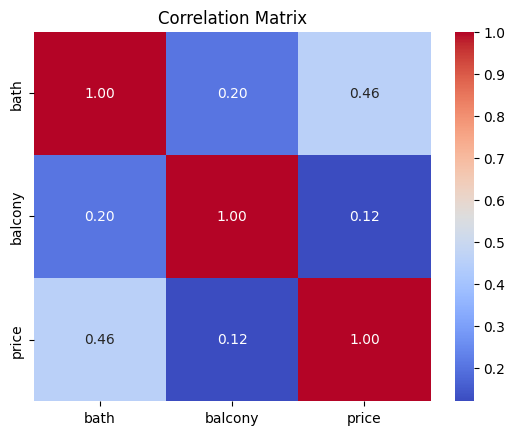

In [99]:
correlation_matrix = bengaluru_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [100]:
# Extract numerical values from the 'total_sqft' column
def extract_numeric_area(df):
    df['total_sqft'] = df['total_sqft'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else np.nan)
    return df

bengaluru_data = extract_numeric_area(bengaluru_data)

bengaluru_data['total_sqft'] = pd.to_numeric(bengaluru_data['total_sqft'], errors='coerce')

In [101]:
# Feature Engineering
bengaluru_data['area_per_bedroom'] = bengaluru_data['total_sqft'] / bengaluru_data['balcony']
bengaluru_data['area_per_bathroom'] = bengaluru_data['total_sqft'] / bengaluru_data['bath']


In [94]:
# Drop unnecessary columns
bengaluru_data = bengaluru_data.drop(['total_sqft', 'balcony', 'bath'], axis=1)

In [102]:
numerical_features = ['total_sqft', 'area_per_bedroom', 'area_per_bathroom']
categorical_features = ['location']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [103]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
svm_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))
])

In [ ]:
svm_regressor.fit(X_train, y_train)

y_pred = svm_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [108]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions for SVM Regressor")
plt.show()

NameError: name 'y_pred' is not defined